## Determination du coefficient de correction avec Glassy Carbon

In [26]:
import numpy as np
import SwingTools
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

- Files path

In [ ]:
glassy_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/GlassyCarbon_Z/'

glassy_exp_files = [glassy_path+'rodriguez_10465_2024-10-14_02-34-25.h5',
                    glassy_path+'rodriguez_10466_2024-10-14_02-34-40.h5']

glassy_ref_file = 'GlassyCarbon_Z.dat'

maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'


- Importer les données des fichiers experimentaux

In [ ]:

for file in glassy_exp_files:
    sample_name, eiger, eiger_mean, basler_image, position, params, time_stamps, transmission = SwingTools.extract_from_h5(file,print_output=False)
    integration = SwingTools.integrate(eiger_mean,params, maskfile )
    SwingTools.save_exported_data(file,sample_name, eiger, basler_image, position, params, time_stamps, transmission, integration ,maskfile)

C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/GlassyCarbon_Z/pos2_10466\Eiger_image/@eiger@pos2@10466.png
C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/GlassyCarbon_Z/pos2_10466\basler_image/@basler@pos2@10466.png


In [19]:
integration_exp_path1 = glassy_path+'pos1_10465/integration/rodriguez_10465_2024-10-14_02-34-25_integration_mean.npy'
integration_exp1 = np.load(integration_exp_path1)
q_exp1 = integration_exp1[:,0] 
i_exp1 = integration_exp1[:,1]

integration_exp_path2 = glassy_path+'pos2_10466/integration/rodriguez_10466_2024-10-14_02-34-40_integration_mean.npy'
integration_exp2 = np.load(integration_exp_path1)
q_exp2 = integration_exp2[:,0] 
i_exp2 = integration_exp2[:,1]

- Importer les données du fichier reference

In [20]:
glassy_ref = np.loadtxt(glassy_path+glassy_ref_file, skiprows=1)
q_ref = glassy_ref[:, 0]  # First column (q_iso)
i_ref1 = glassy_ref[:, 1]  # Second column (i_iso)
i_ref2 = glassy_ref[:, 2]

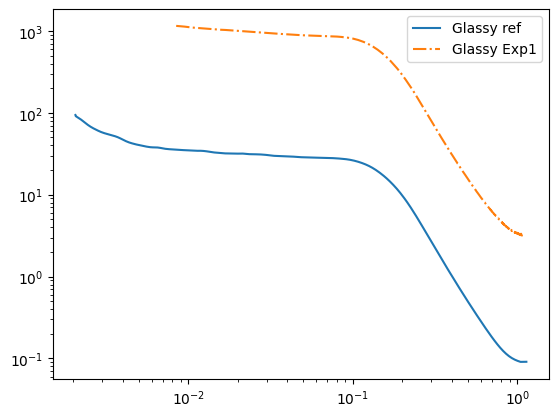

In [33]:
fig,ax = plt.subplots()
ax.loglog(q_ref,i_ref1,label= 'Glassy ref')
ax.loglog(q_exp1,i_exp1,linestyle = '-.',label='Glassy Exp1')
#ax.loglog(q_exp2,i_exp2, linestyle = '-.' ,label='Glassy Exp2')

ax.legend()

- calcul du coefficient

In [31]:
# Create an interpolation function
f = interp1d(q_ref, i_ref1, bounds_error=False, fill_value='extrapolate')
    # Interpolate i_Foxtrot to match the shape of i_pyFAI_raw
i_ref1_interpolated = f(q_exp1)
coef =  i_ref1_interpolated/i_exp1
mean_coef = np.mean(coef[1:-1])
sigma_coef= np.std(coef[1:-1])
print (mean_coef,' +/- ' ,sigma_coef)

0.030834760212486843  +/-  0.0022973525542421135


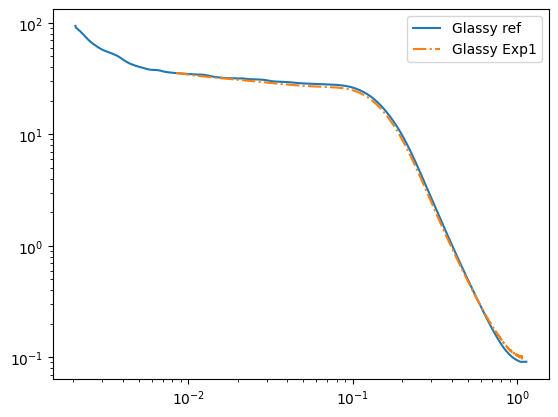

In [34]:
fig,ax = plt.subplots()
ax.loglog(q_ref,i_ref1,label= 'Glassy ref')
ax.loglog(q_exp1,mean_coef*i_exp1,linestyle = '-.',label='Glassy Exp1')
ax.legend()